In [1]:
import os
import folium

In [17]:
import geopandas as gpd

assert 'naturalearth_lowres' in gpd.datasets.available
datapath = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(datapath)

In [19]:
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [20]:
gdf.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"pop_est": 28400000.0, "continent": "Asia", "name": "Afghanistan", "iso_a3": "AFG", "gdp_md_est": 22270.0}, "geometry": {"type": "Polygon", "coordinates": [[[61.210817091725744, 35.650072333309225], [62.230651483005886, 35.270663967422294], [62.98466230657661, 35.40404083916762], [63.19353844590035, 35.857165635718914], [63.98289594915871, 36.0079574651466], [64.5464791197339, 36.31207326918427], [64.7461051776774, 37.111817735333304], [65.58894778835784, 37.30521678318564], [65.74563073106683, 37.66116404881207], [66.21738488145934, 37.39379018813392], [66.51860680528867, 37.36278432875879], [67.07578209825962, 37.35614390720929], [67.82999962755952, 37.144994004864685], [68.13556237170138, 37.02311513930431], [68.85944583524594, 37.344335842430596], [69.19627282092438, 37.15114350030743], [69.51878543485796, 37.60899669041342], [70.11657840361033, 37.58822276463209], [70.27057417184014, 37.73516

In [5]:
import pandas as pd


n_periods, n_sample = 48, 40

assert n_sample < n_periods

datetime_index = pd.date_range('2016-1-1', periods=n_periods, freq='M')
dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = dt_index_epochs.astype('U10')

dt_index

Index(['1454198400', '1456704000', '1459382400', '1461974400', '1464652800',
       '1467244800', '1469923200', '1472601600', '1475193600', '1477872000',
       '1480464000', '1483142400', '1485820800', '1488240000', '1490918400',
       '1493510400', '1496188800', '1498780800', '1501459200', '1504137600',
       '1506729600', '1509408000', '1512000000', '1514678400', '1517356800',
       '1519776000', '1522454400', '1525046400', '1527724800', '1530316800',
       '1532995200', '1535673600', '1538265600', '1540944000', '1543536000',
       '1546214400', '1548892800', '1551312000', '1553990400', '1556582400',
       '1559260800', '1561852800', '1564531200', '1567209600', '1569801600',
       '1572480000', '1575072000', '1577750400'],
      dtype='object')

In [6]:
import numpy as np


styledata = {}

for country in gdf.index:
    df = pd.DataFrame(
        {'color': np.random.normal(size=n_periods),
         'opacity': np.random.normal(size=n_periods)},
        index=dt_index
    )
    df = df.cumsum()
    df.sample(n_sample, replace=False).sort_index()
    styledata[country] = df

In [7]:
gdf.loc[0]

pop_est                                                2.84e+07
continent                                                  Asia
name                                                Afghanistan
iso_a3                                                      AFG
gdp_md_est                                                22270
geometry      POLYGON ((61.21081709172574 35.65007233330923,...
Name: 0, dtype: object

In [8]:
styledata.get(0).head()

,color,opacity
1454198400,-1.651285,-1.439846
1456704000,-0.629444,-0.605396
1459382400,0.961853,-2.374662
1461974400,-1.836130,-0.780838
1464652800,-2.076636,-1.253771


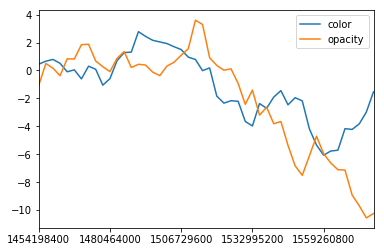

In [9]:
ax = df.plot()

In [10]:

max_color, min_color, max_opacity, min_opacity = 0, 0, 0, 0

for country, data in styledata.items():
    max_color = max(max_color, data['color'].max())
    min_color = min(max_color, data['color'].min())
    max_opacity = max(max_color, data['opacity'].max())
    max_opacity = min(max_color, data['opacity'].max())

In [11]:
from branca.colormap import linear


cmap = linear.PuRd_09.scale(min_color, max_color)


def norm(x):
    return (x - x.min()) / (x.max() - x.min())


for country, data in styledata.items():
    data['color'] = data['color'].apply(cmap)
    data['opacity'] = norm(data['opacity'])

In [12]:
styledata.get(0).head()

,color,opacity
1454198400,#e2d6e9,0.625040
1456704000,#dccae3,0.713731
1459382400,#d4b8da,0.525681
1461974400,#e3d8eb,0.695084
1464652800,#e4dbec,0.644817


In [13]:
styledict = {
    str(country): data.to_dict(orient='index') for
    country, data in styledata.items()
}

In [21]:
styledict

{'0': {'1454198400': {'color': '#e2d6e9', 'opacity': 0.6250397909298673},
  '1456704000': {'color': '#dccae3', 'opacity': 0.7137313188665267},
  '1459382400': {'color': '#d4b8da', 'opacity': 0.5256805606667152},
  '1461974400': {'color': '#e3d8eb', 'opacity': 0.6950840689704395},
  '1464652800': {'color': '#e4dbec', 'opacity': 0.6448172465660181},
  '1467244800': {'color': '#e5dded', 'opacity': 0.5007377453865874},
  '1469923200': {'color': '#e6dfee', 'opacity': 0.44611745535148273},
  '1472601600': {'color': '#e5dbec', 'opacity': 0.5239133994397248},
  '1475193600': {'color': '#e7e0ef', 'opacity': 0.6778621012606396},
  '1477872000': {'color': '#ebe5f1', 'opacity': 0.3490065878284927},
  '1480464000': {'color': '#e7e0ef', 'opacity': 0.3695481141061361},
  '1483142400': {'color': '#eae4f1', 'opacity': 0.3495999848961914},
  '1485820800': {'color': '#e9e3f0', 'opacity': 0.31329339719305116},
  '1488240000': {'color': '#ece7f2', 'opacity': 0.27434216196185607},
  '1490918400': {'color': 

In [16]:
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [15]:

from folium.plugins import TimeSliderChoropleth

m = folium.Map([0, 0], tiles='Stamen Toner', zoom_start=2)

g = TimeSliderChoropleth(
    gdf.to_json(),
    styledict=styledict,

).add_to(m)


m